In [1]:
# this is just a script to plot the figures that will be used in the paper
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

fitness_names = ["fitness_1", "fitness_2"]
names2labels = {fitness_names[0] : "Total soybean yield over 10 years (tons)",
                fitness_names[1] : "Inter-year variance (tons)"}

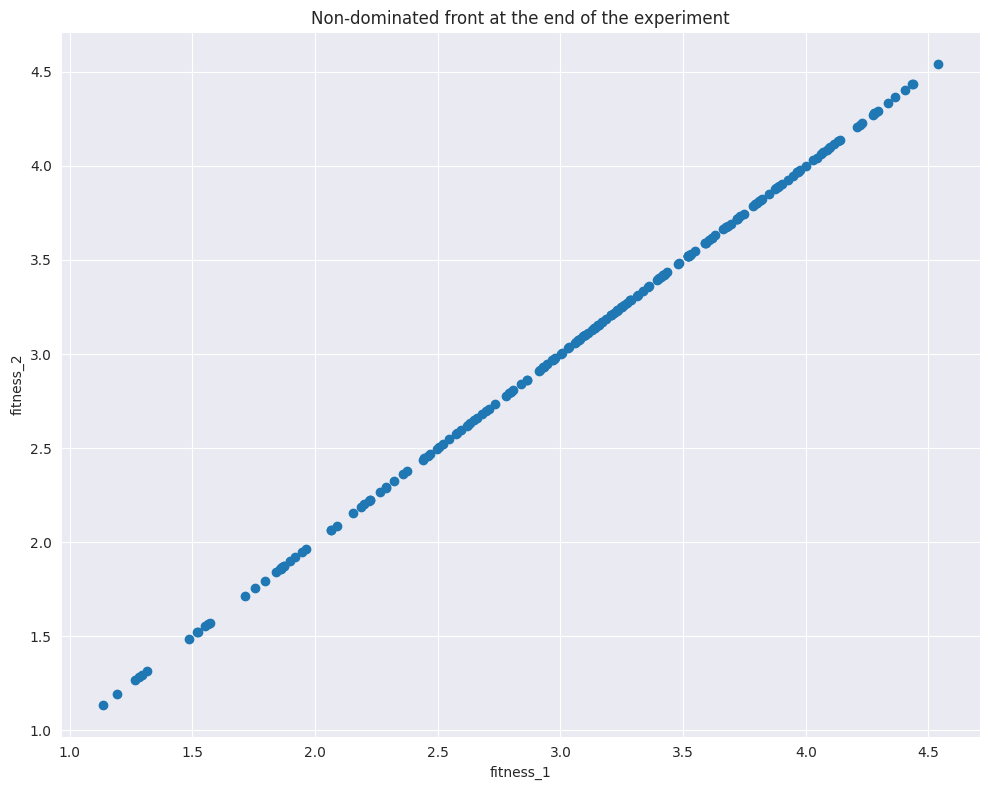

In [2]:
# let's start with something simple: we plot the final Pareto front from one of the experiments
data_file = "./unique-name/42-population.csv-generation-0.csv"
df = pd.read_csv(data_file)

x = df[fitness_names[0]].values
y = df[fitness_names[1]].values

fig = plt.figure(figsize=(10, 8))
axes = plt.axes()
axes.scatter(x, y)

axes.set_title("Non-dominated front at the end of the experiment")
axes.set_xlabel(fitness_names[0])
axes.set_ylabel(fitness_names[1])

plt.tight_layout()
plt.show()

Getting the last generation index

In [3]:
import os

path = "./unique-name/" 
file_prefix = "42-population.csv-generation-"


i = 0
absolute_path = path + file_prefix + f"{0}.csv"

while os.path.exists(absolute_path) :
    i+=1
    absolute_path = path + file_prefix + f"{i}.csv"


last_gen = i-1

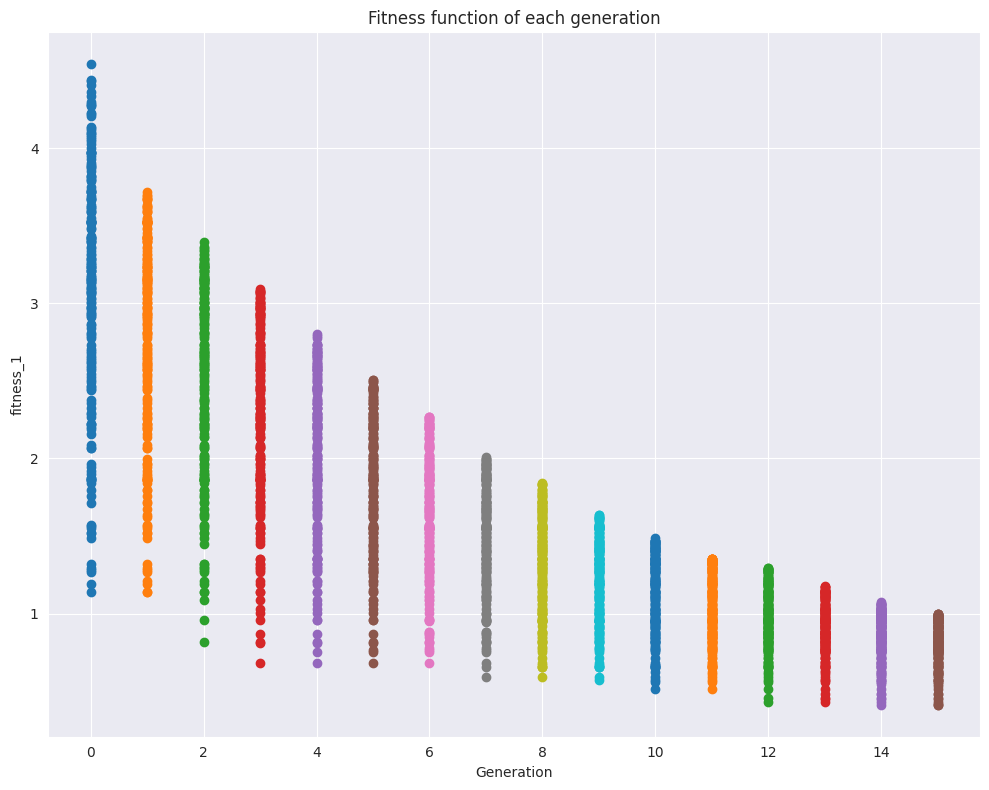

In [4]:
df = []
fig = plt.figure(figsize=(10, 8))
axes = plt.axes()


for i in range(last_gen) :
    data_file = f"./unique-name/42-population.csv-generation-{i}.csv"
    df = pd.read_csv(data_file)
    
    x = df[fitness_names[0]].values
    y = [i for _ in x]

    axes.scatter(y, x)

    axes.set_title("Fitness function of each generation")
    axes.set_xlabel("Generation")
    axes.set_ylabel(fitness_names[0])

plt.tight_layout()
plt.show()

In [5]:
data_file = f"./unique-name/42-population.csv-generation-{last_gen}.csv"
df = pd.read_csv(data_file)


list_fitness = df[fitness_names[0]].to_list()

list_elasticity = []

i=0
while f"gene_{i}" in df.columns :
    list_elasticity.append(df[f"gene_{i}"].values)
    i+=1

list_fitness*=len(list_elasticity)

0.2009294895790857


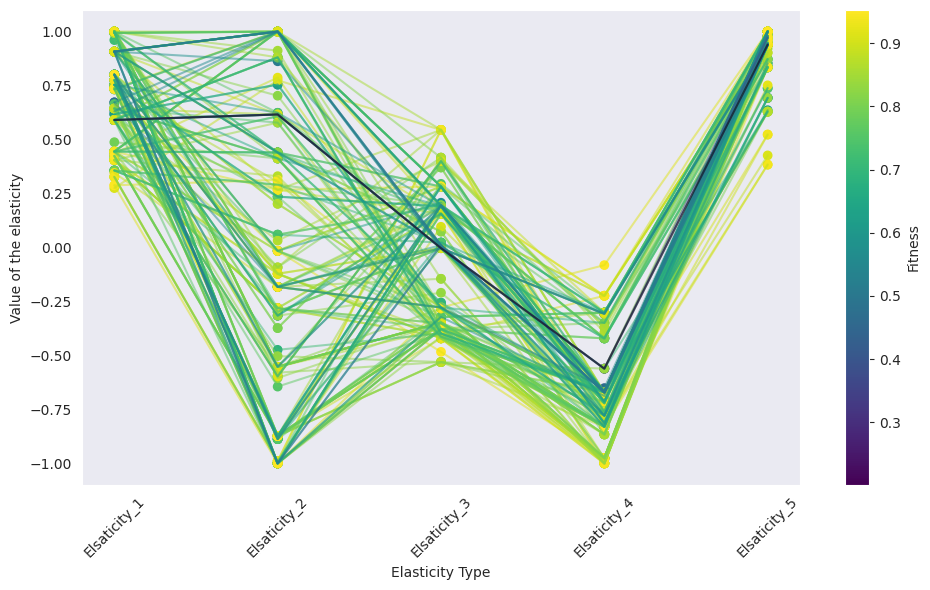

In [18]:
def plot_distribution(plot_line = True) :
    import matplotlib.pyplot as plt
    
    # data conformation
    num_distributions = len(list_elasticity)
    num_points_per_dist = len(list_elasticity[0])

    distributions = {}
    labels = []

    for i in range(num_distributions):
        label = f'Elsaticity_{i+1}'
        labels.append(label)
        distributions[label] = list_elasticity[i]


    x_labels = []
    y_values = []
    colors = []

    for label, values in distributions.items():
        x_labels.extend([label] * num_points_per_dist)
        y_values.extend(values)
        colors.extend([list_fitness[i] for i in range(num_points_per_dist)])


    plt.figure(figsize=(10, 6))

    plt.scatter(x_labels, y_values, c=colors, cmap='viridis')

    if plot_line == True : 

        index_sorted = sorted(range(len(df[fitness_names[0]].to_list())), key=lambda i: df[fitness_names[0]].to_list()[i], reverse=False)

        for i in range(num_points_per_dist):
            xs = [label for label in labels]
            ys = [distributions[label][index_sorted[i]] for label in labels]
            plt.plot(xs, ys, color=plt.cm.viridis(colors[index_sorted[i]]), alpha=0.5)
            if i == num_points_per_dist-1 :
                print(colors[index_sorted[i]])
                plt.plot(xs, ys, color="black", alpha=0.5)

    plt.xlabel('Elasticity Type')
    plt.ylabel('Value of the elasticity')
    plt.xticks(rotation=45)  
    plt.grid(True)
    plt.tight_layout()
    plt.colorbar(label='Fitness')
    plt.grid(False)
    plt.show()

plot_distribution(plot_line=True)

IndexError: list index out of range

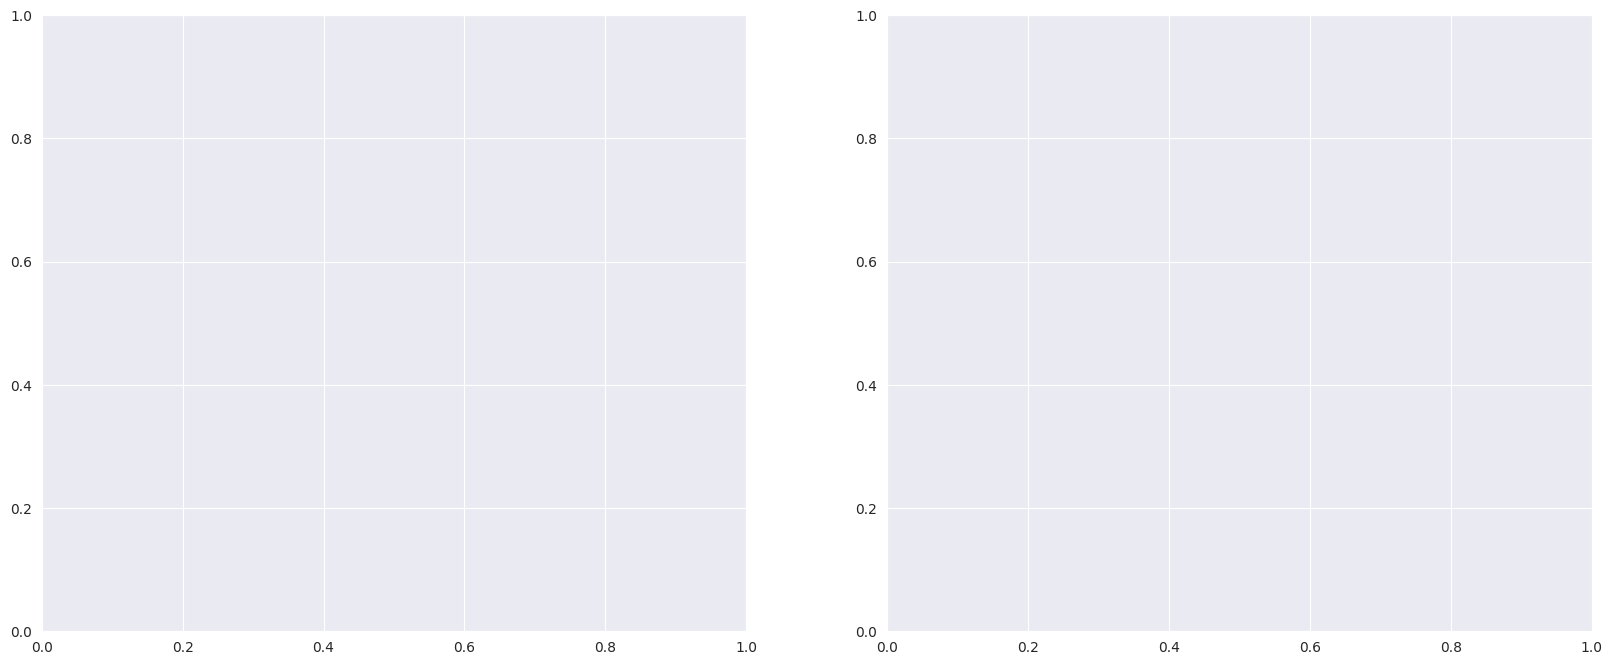

In [7]:
# now, here I need to perform some dark magic to avoid issues with labels
df[fitness_names[0]] = df[fitness_names[0]].values * -1.0

# this plot kinda sucks, though; maybe it's better to have two plots side by side
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(121) # 1x2 grid, 1st subplot
ax2 = fig.add_subplot(122) # 1x2 grid, 2nd subplot

sns.scatterplot(data=df, x=fitness_names[0], y=fitness_names[1], hue=fitness_names[2], ax=ax1)
ax1.set_xlabel(names2labels[fitness_names[0]])
ax1.set_ylabel(names2labels[fitness_names[1]])
ax1.invert_xaxis()

sns.scatterplot(data=df, x=fitness_names[0], y=fitness_names[2], hue=fitness_names[1], ax=ax2)
ax2.set_xlabel(names2labels[fitness_names[0]])
ax2.set_ylabel(names2labels[fitness_names[2]])
ax2.invert_xaxis()

fig.suptitle("Final non-dominated front", fontsize=20)

plt.savefig("../results/2024-01-19-soja-allocation-3-objectives-gen520.png", dpi=300)

In [1]:
class MaClasse:
    attribut_de_classe = "Bonjour"

    def __init__(self, valeur):
        self.valeur = valeur

    @classmethod
    def methode_de_classe(cls, x, y):
        return cls.attribut_de_classe + " " + str(x + y)

# Utilisation de la méthode de classe sans instancier la classe
resultat = MaClasse.methode_de_classe(3, 5)
print(resultat)  # Affiche: Bonjour 8


Bonjour 8
